<a href="https://colab.research.google.com/github/MatthewK84/Python-Code/blob/main/Rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsforecast -U

In [41]:
import pandas as pd
import numpy as np
from tqdm.autonotebook import tqdm
import plotly
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, AutoETS, AutoTheta, AutoCES
from scipy.stats import pearsonr

rain = pd.read_csv("/content/rain1.csv")
rain.head()

,Year,Z
0,1871,0.007220
1,1872,0.788207
2,1873,-1.092659
3,1874,1.521059
4,1875,0.981949


In [16]:
rain.describe()

,Year,Z
count,146.000000,146.000000
mean,1943.500000,0.000750
std,42.290661,1.004239
min,1871.000000,-2.937425
25%,1907.250000,-0.659747
50%,1943.500000,0.125752
75%,1979.750000,0.690132
max,2016.000000,2.070999


In [26]:
columns = "Year Z".split() # Declare the columns names
df = pd.DataFrame(rain, columns=columns) # load the dataset as a pandas data frame
y = rain.Z # define the target variable (dependent variable) as y

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(116, 2) (116,)
(30, 2) (30,)


In [29]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

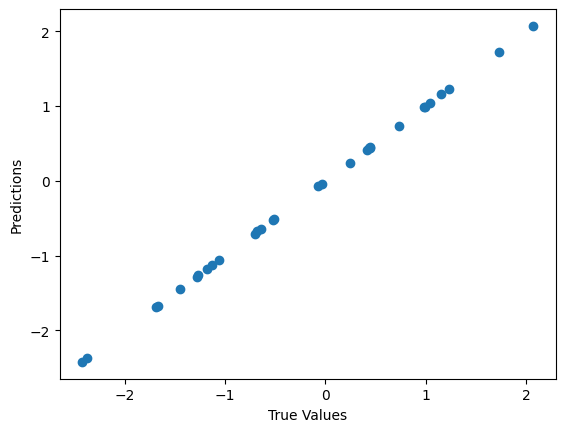

In [31]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [33]:
print ("Score:", model.score(X_test, y_test))

Score: 1.0


In [43]:
# Calculate Pearson correlation coefficient and the p-value
correlation_coefficient, p_value = pearsonr(rain['Year'], rain['Z'])

print(f"Pearson correlation coefficient: {correlation_coefficient:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: -0.092
P-value: 0.267


In [46]:
# Calculate and print the percentiles
percentiles = [0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
for p in percentiles:
    value = rain['Z'].dropna().quantile(p)  # dropna() to exclude missing values
    print(f"{int(p*100)}% percentile: {value}")

25% percentile: -0.6597472925
50% percentile: 0.125752106
75% percentile: 0.69013237025
90% percentile: 1.2135980745000001
95% percentile: 1.45758122775
99% percentile: 1.8102286399500018


In [51]:
# 1. Create a synthetic 'unique_id' column
rain['unique_id'] = range(1, len(rain) + 1)

# 2. Rename the 'year' column to 'ds'
rain.rename(columns={'Year': 'ds'}, inplace=True)

# 3. Rename the 'Z' column to 'y' (replace 'Z' with your actual column name)
rain.rename(columns={'Z': 'y'}, inplace=True)

# Display the modified DataFrame
print(rain.head())

     ds         y  unique_id
0  1871  0.007220          1
1  1872  0.788207          2
2  1873 -1.092659          3
3  1874  1.521059          4
4  1875  0.981949          5
